# Environment Setup

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Clone LLaVA-VQA and install dependencies

In [ ]:
%cd /content
!git clone --recursive https://github.com/PatrickKollman/LLaVA-VQA.git

In [ ]:
%cd /content/LLaVA-VQA
!pip install -e .  # Install my repo dependencies

### Copy data from Google Drive and unzip

In [ ]:
!cp /content/drive/MyDrive/VizWiz/data/Images/train.zip /content

In [ ]:
!cp /content/drive/MyDrive/VizWiz/data/Annotations/train.json /content/train_annotations.json
!cp /content/drive/MyDrive/VizWiz/data/Annotations/train.json /content/train_annotations.json


In [ ]:
%cd /content
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/VizWiz_train_00016897.jpg  
  inflating: train/VizWiz_train_00022049.jpg  
  inflating: train/VizWiz_train_00010269.jpg  
  inflating: train/VizWiz_train_00001449.jpg  
  inflating: train/VizWiz_train_00004288.jpg  
  inflating: train/VizWiz_train_00011536.jpg  
  inflating: train/VizWiz_train_00003138.jpg  
  inflating: train/VizWiz_train_00000748.jpg  
  inflating: train/VizWiz_train_00007422.jpg  
  inflating: train/VizWiz_train_00014674.jpg  
  inflating: train/VizWiz_train_00004900.jpg  
  inflating: train/VizWiz_train_00022766.jpg  
  inflating: train/VizWiz_train_00010259.jpg  
  inflating: train/VizWiz_train_00005425.jpg  
  inflating: train/VizWiz_train_00011918.jpg  
  inflating: train/VizWiz_train_00008013.jpg  
  inflating: train/VizWiz_train_00009540.jpg  
  inflating: train/VizWiz_train_00013833.jpg  
  inflating: train/VizWiz_train_00023196.jpg  
  inflating: train/VizWiz_train_00000160.jpg  
  inflati

In [ ]:
!rm train.zip

# VizWiz Visualization

In [ ]:
%cd /content

/content


In [ ]:
import glob
import os
import random

from matplotlib import pyplot as plt
from skimage import io

from src.data_visualization.vizwiz_interface import VizWiz

### Training Images

In [ ]:
train_img_dir = f"/content/train"
train_img_file_paths = list(set(glob.glob(f"{train_img_dir}/*.jpg")))
print(f"{len(train_img_file_paths)} images in {train_img_dir}")

23954 images in /content/train


### Load Questions and Answers into VQA interface

In [ ]:
ann_file = "/content/train.json"

### VizWiz Interface for QA annotations

In [ ]:
vizwiz = VizWiz(ann_file)

Loading VizWiz questions and annotations into memory...


### Load and display QA annotations for given answer types

In [ ]:
def visualize_random_sample(
    vizwiz: VizWiz,
    imgs: list[str] | str = [],
    ans_types: list[str] | str = [],
) -> None:
    """Visualize a Random VizWiz sample.

    :param vizwiz: VizWiz data interface
    :param image_ids: filter by specific image ids
    :param ans_types: filter by VizWiz answer type
    """
    # Get Annotations from filter
    anns = vizwiz.get_anns(imgs=imgs, ans_types=ans_types)
    if len(anns) == 0:
        print("No annotations found")
        return

    # Choose a random annotation to show
    random_qa = random.choice(anns)
    vizwiz.show_qa([random_qa])

    # Plot Image
    img_id = random_qa['image']
    img_file_path = f"{train_img_dir}/{img_id}"
    if os.path.isfile(img_file_path):
        I = io.imread(img_file_path)
        plt.imshow(I)
        plt.axis("off")
        plt.show()

### Yes or No?

Question: Is this a black pen?
Answer: 
yes
yes
yes
yes
yes
yes
unanswerable
yes
yes
yes


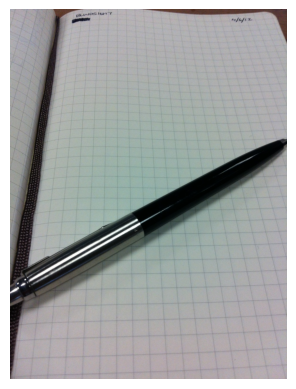

In [ ]:
visualize_random_sample(vizwiz=vizwiz, ans_types="yes/no")

### Select Images

In [ ]:
imgs = vizwiz.get_imgs()

Question: Okay. This might be recording. This is like test number 4. And, if it is, just let me know you got number 4. Thanks, I appreciate it.
Answer: 
unanswerable
unanswerable
unanswerable
4
i got number 4
yes
unanswerable
4
as matter fact i did not get number 4 sorry
i got number 4


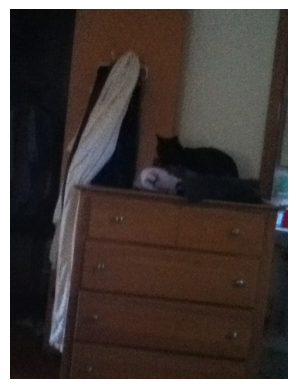

In [ ]:
visualize_random_sample(vizwiz=vizwiz, imgs=imgs)

Question: What is this?
Answer: 
this can
unanswerable
can in hand
unanswerable
canned goods
unanswerable
unanswerable
unanswerable
can
paint


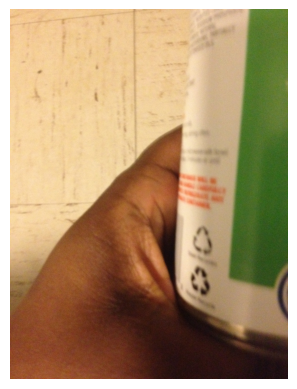

In [ ]:
visualize_random_sample(vizwiz=vizwiz, imgs=imgs)